# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Data Pre-processing

In [2]:
dataset = pd.read_csv("IRIS.csv")
X = dataset.iloc[:, 0: -1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<h6>Label Encoding</h6>

In [5]:
le = LabelEncoder()
y = le.fit_transform(y)

<h6>Splitting the dataset into the Training set and Test set</h6>

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<h6>Feature Scaling</h6>

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building the Model

<h6>Initialising the ANN</h6>

In [8]:
classifier = Sequential()

<h6>Adding the input layer and the first hidden layer</h6>

In [9]:
classifier.add(Dense(units=6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))

<h6>Adding the second hidden layer</h6>

In [10]:
classifier.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu'))

<h6>Adding the output layer</h6>

In [11]:
classifier.add(Dense(1, kernel_initializer = 'uniform', activation = 'softmax'))

# Training of the ANN

<h6>Compiling the ANN (Configuring the learning process)</h6>

In [12]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

<h6>Fitting the ANN to the Training set</h6>

In [13]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: 0.6903 - accuracy: 0.3083
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6830 - accuracy: 0.3083
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6750 - accuracy: 0.3083
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6649 - accuracy: 0.3083
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6532 - accuracy: 0.3083
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6350 - accuracy: 0.3083
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6134 - accuracy: 0.3083
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5852 - accuracy: 0.3083
Epoch 9/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5448 - accuracy: 0.3083
Epoch 10/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5003 - accuracy: 0.3083
Epoch 11/

Epoch 82/100
12/12 [==============================] - 0s 4ms/step - loss: -60.6386 - accuracy: 0.3083
Epoch 83/100
12/12 [==============================] - 0s 4ms/step - loss: -62.9447 - accuracy: 0.3083
Epoch 84/100
12/12 [==============================] - 0s 3ms/step - loss: -65.2274 - accuracy: 0.3083
Epoch 85/100
12/12 [==============================] - 0s 4ms/step - loss: -67.5422 - accuracy: 0.3083
Epoch 86/100
12/12 [==============================] - 0s 4ms/step - loss: -69.8607 - accuracy: 0.3083
Epoch 87/100
12/12 [==============================] - 0s 4ms/step - loss: -72.2812 - accuracy: 0.3083
Epoch 88/100
12/12 [==============================] - 0s 3ms/step - loss: -74.8760 - accuracy: 0.3083
Epoch 89/100
12/12 [==============================] - 0s 3ms/step - loss: -77.4220 - accuracy: 0.3083
Epoch 90/100
12/12 [==============================] - 0s 3ms/step - loss: -80.0222 - accuracy: 0.3083
Epoch 91/100
12/12 [==============================] - 0s 3ms/step - loss: -82.5958

# Making the predictions and Evaluating the model

<h6>Predicting the Test set results</h6>

In [14]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

1/1 [==============================] - 0s 201ms/step


<h6>Making the Confusion Matrix</h6>

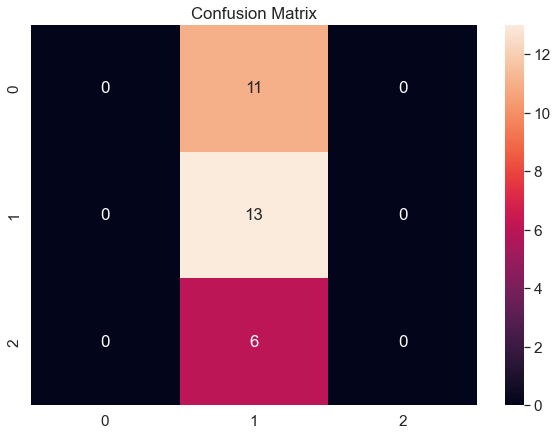

In [15]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True)
plt.show()